# <font color='blue'>Fundamentals of Data Analysis - Project</font> 
- **Course** Higher Diploma in Data Analytics, GMIT, Ireland
- **Lecturer** Ian McLoughlin
- **Author** Mark Cotter
- **Email** g00376335@gmit.ie
- **Dates** September 2019 to November 2019

This document is my analysis of the well-known 'tips' dataset. The program run in this jupyter notebook and uses the Python<font color='blue'>[1]</font> programming language to analyse the dataset. The tips dataset come preloaded into the seaborn Python module.


### <font color='blue'>Project setup</font>

In [1]:
# This code imports python libraries and the 'tips' dataset.

# import numpy for use of arrays
import numpy as np
# import pandas to use DataFrames for the dataset
import pandas as pd
# import seaborn for ploting and loading tips dataset
import seaborn as sns
# import matplotlib pyplot for ploting
import matplotlib.pyplot as plt

#The python seaborn module already includes the 'tips' dataset
#Code adapted from https://seaborn.pydata.org/introduction.html?highlight=tips%20dataset
tips = sns.load_dataset("tips")

### <font color='blue'>Dataset description</font>

#### <font color='blue'>Initial dataset review</font>
A basis summary of the dataset content can be viewed by looking at the first few and last few lines in the dataset.

In [2]:
# Print heading
print("\nFirst 5 lines of the 'tips' dataset")
# Print first 5 lines of the dataset
tips.head()


First 5 lines of the 'tips' dataset


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Print heading
print("\nLast 5 lines of the 'tips' dataset")
# Print last 5 lines of the dataset
tips.tail()


Last 5 lines of the 'tips' dataset


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The 'tips' dataset includes 244 observations during which 7 variables were recorded. Based on the names of the variables, it appears that the dataset relates to information recorded at a restaurant over a number of days.

Research shows that there are varying opinions on what the variable 'sex' represents. A number of sources describe the sex variable as the 'gender of the payer of the bill' and that the observations where taken by one waiter/waitress<font color='blue'>[2]</font>.
Another source describes the sex variable as 'gender of server'.
The most popular opinion is that the observations are recorded by one waiter/waitress and the variable 'sex' relates to the 'gender of the payer of the bill', which in my view seems reasonable.

There is also varying opinions as to weather the amount of the variable 'total_bill' includes or excludes the amount of the variable 'tip'<font color='blue'>[3]</font>. I noted that a number of reviews for the dataset, refer to the variable 'total_bill' as 'bill'. Insofar as the one quarter of the sum of 'total_bill' and 'tip' amounts to whole number, compared to only 2% of total_bill(refer to analysis below), it appears that the total_bill refers to the total menu price of the meals for every person at the table excluding tip.

For the purposes of this analysis, the variables observed in the dataset are assumed to represent the following:

In [4]:
%%html
<!--# Justify table to left. Code verbatim from https://stackoverflow.com/a/46022752-->
<style> table {float:left} </style>

**Variable** | **Description** 
-: | :-
**total_bill** | The total cost of the bill for meals at a table excluding tip
**tip** | The tip received by the table waiter/waitress
**sex** | The gender of the table bill payer
**smoker** | Weather or not the bill payer was a smoker 
**day** | Day of the week 
**time** | Meal time 
**size** | The party size that was served

Note that insofar as the word 'size' is a python keyword that returns the number of elements in a pandas dataframe<font color='blue'>[4]</font>, I have opted to change this variable name to 'party_size' to simplify my assessment of the dataset.

In [5]:
# Change Dataframe column header label 'size' to 'party_size'
# Code adapted from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
tips.rename(columns={'size': 'party_size'}, inplace=True)

#### <font color='blue'>Basic dataset statistics</font>

In [6]:
# This code describes some basis statistics about the dataset.

# Print heading
print("Basic 'tips' dataset statistics")
# Print dataset statistics
tips.describe()

Basic 'tips' dataset statistics


,total_bill,tip,party_size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# Print Title
print("Breakdown of daily meal counts")
# Display daily breakdown of meal times
# Code adapted from https://dfrieds.com/data-analysis/crosstabs-python-pandas
pd.crosstab(index=tips['day'], columns=tips['time'], margins=True)

Breakdown of daily meal counts


time,Lunch,Dinner,All
day,,,
Thur,61,1,62
Fri,7,12,19
Sat,0,87,87
Sun,0,76,76
All,68,176,244


In [8]:
# Print Title
print("Percentage of Male/Female patrons who smoke or do not smoke")
#Display counts of occurance as percentages of total # of observations
# Code adapted from https://stackoverflow.com/a/26050459 and
# https://dfrieds.com/data-analysis/crosstabs-python-pandas
pd.crosstab(index=tips['smoker'], columns=tips['sex'], margins=True).rename(
    columns={"Male": "%_Male", "Female": "%_Female"}).apply(
    lambda row: np.round(100*row/len(tips),1), axis=1)

Percentage of Male/Female patrons who smoke or do not smoke


sex,%_Male,%_Female,All
smoker,,,
Yes,24.6,13.5,38.1
No,39.8,22.1,61.9
All,64.3,35.7,100.0


These basic statistics for the 'tips' dataset show that the 244 observations were recorded on only 4 days of the week. The fact that these 4 days are approaching or during the weekend, suggests that either the waiter/waitress taking the observations worked only 4 nights per week, the restaurant may be closed Monday to Wednesday or only four consecutive days were included in the observations. Saturday is the day with the most meals served. The amount of meals served on Friday is much lower than the other three days. The majority of the bill paying patrons are non-smoking males. The average total_bill and tip are \\$17.79 and \\$2.90 respectively.

### <font color='blue'>Regression of primary data</font>

The two most notable variables in this dataset are the **'total bill'** and the **'tip'** received with the bill. Plotting of the the data points distribution can identify various patterns in the data.

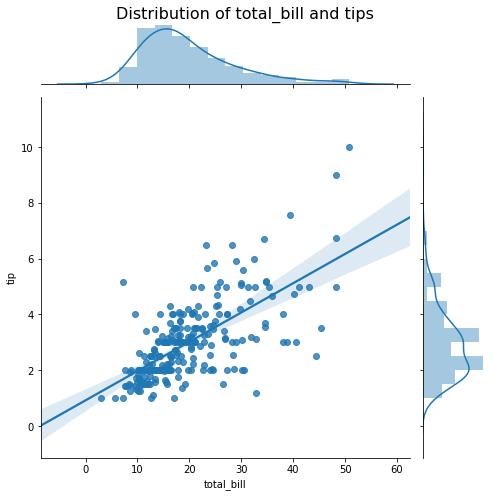

In [9]:
# Compare distribution of total bill and tips
# Code adapted from https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions 
# and https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
plot = sns.jointplot(x="total_bill", y="tip", kind="reg", height=7, data=tips)

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of total_bill and tips", fontsize = 16)
# Display plot
plt.show()

The plot above shows a general trend that the tip received is directly proportional to the amount of the total bill.

#### <font color='blue'>Distribution of tip and total_bill percentage</font>
Every bill in this dataset has a tip associated with it. There is a high probability that this dataset originates in the USA, as tipping in the USA at restaurants is expected and is considered part of the serving staffs wages in many US states<font color='blue'>[5]</font>. In other countries tipping is less common.  The generally accepted minimum tip in USA is recommended to be 15% of the total bill. Better service is often rewarded with higher tip rates.

Tip % (tip/total_bill) summary: Max 71%, Min 4%, Mean 16% & Median 16%.


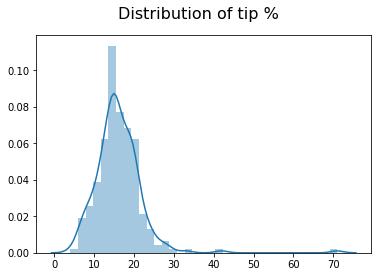

In [10]:
# The following code reviews the tip percentage compared to the total_bill
# to explore if this 15% or higher tip rate is apparent in the tips dataset.

# Calculate tip percentage of total_bill. Code adapted from
# https://stackoverflow.com/a/26050459
tip_per = tips.apply(lambda row: np.round(100*row.tip/row.total_bill,0), axis=1)

# Display the min, max, mean and median tip %
print("Tip % (tip/total_bill) summary: Max {0:.0f}%, Min {1:.0f}%, Mean {2:.0f}% & Median {3:.0f}%.".format(
       tip_per.max(), tip_per.min(), tip_per.mean(), tip_per.median()))

# Plot distribution of tip percentages
# Code adapted from http://seaborn.pydata.org/generated/seaborn.distplot.html
plot = sns.distplot(tip_per)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.suptitle("Distribution of tip %", fontsize = 16)
plt.show()

The above statistics and distribution plot of the tip percentage show that is mean tip is 16% and median tip percentage is indeed 15%. The majority of the tips lie within the 5% to 25% range with a few outliers high and low tip percentage rates.

#### <font color='blue'>Review of combined payment</font>
A general look at the various amounts for total_bill and tip show that the sum of the two values appear to regularly add up to a whole number. This would suggests that the total_bill variable does not include the amount of tip variable.

In [11]:
# The following code looks at how often the total_bill and
# sum of the two values added to a whole number.

# count whole sum values for total_bill
# temp counter
counter = 0
# Iterate through the index rows in the dataframe tips
# Code adapted from https://stackoverflow.com/a/16476974
for index, row in tips.iterrows():
    # check if the total_bill is a whole number
    if (row['total_bill'] % 1.0 == 0.0):
        # If sum == whole number add 1 to the counter
        counter += 1
# print the % of whole number sum_payments 
# (counted_total_bill=whole number / Number_of_bills)
print("The percentage of total_bill resulting in a whole number is {0:.0f}%.".format(
       100 * counter / tips.total_bill.count()))

# Add new column to dataframe and calculate sum of total_bill and tip
# Code adapted from
# "Python for Data Analysis" by Wes McKinney 2nd edition (2018) - Chapter 9
tips['sum_payment'] = tips['total_bill'] + tips['tip']

# count whole sum values for sum_payment
# temp counter
counter = 0
# Iterate through the index rows in the dataframe tips
# Code adapted from https://stackoverflow.com/a/16476974
for index, row in tips.iterrows():
    # check if the sum_payment is a whole number
    if (row['sum_payment'] % 1.0 == 0.0):
        # If sum == whole number add 1 to the counter
        counter += 1
# print the % of whole number sum_payments 
# (counted_sum=whole number / Number_of_bills)
print("The percentage of sum payments resulting in a whole number is {0:.0f}%.".format(
       100 * counter / tips.total_bill.count()))

The percentage of total_bill resulting in a whole number is 2%.
The percentage of sum payments resulting in a whole number is 25%.


The above calculation shows that only about a quarter of the sum of total_bill and tip are rounded up to a whole number by the patron paying the bill. As such this is not a common occurrence, but it does highlight that the tip amount does not appear to be included in the total_bill amount as only 2% of the total_bill results in a whole number amount. The 15% tip rate appears to be a better guideline for the amount of tip received.

### <font color='blue'>Analysis of the Dataset</font>

#### <font color='blue'>Distribution of data for smokers</font>
The following plots give the distribution of data points splitting smokers from non-smokers.

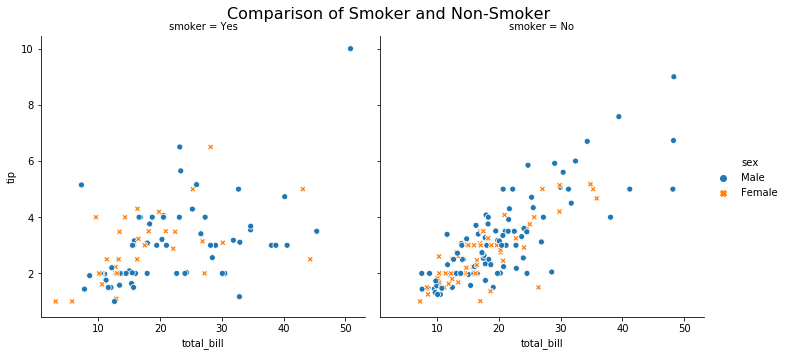

In [12]:
# Display relative plot of bill payed by either sex and if they were a smoker
# Code adapted from https://seaborn.pydata.org/introduction.html and
# https://seaborn.pydata.org/generated/seaborn.relplot.html
plot = sns.relplot(x="total_bill", y="tip", col="smoker",
            style="sex", hue="sex", data=tips);

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.9)
plt.suptitle("Comparison of Smoker and Non-Smoker", fontsize = 16)
plt.show()

It is clear from the above non-smokers plot, data points for tips received are more clustered proportional to the cost of the total bill. A similar plot of data points appears more scattered for smokers. This variability in tipping amount for smokers may infer that some smokers may choose to spend on smoking rather than tipping. Both of these observations appears to be similar for both male and female patrons paying the bill.

However, the party_size variable may be masking some of this review. When the amount of tip received is adjusted for the party_size, the following distribution plots and statistics appear to show that on average smokers tend to give a higher average tip per person than non-smokers.


Tip summary from smokers adjusted for party_size:
Max 3.33, Min 0.40, Mean 1.30 and Median 1.17.



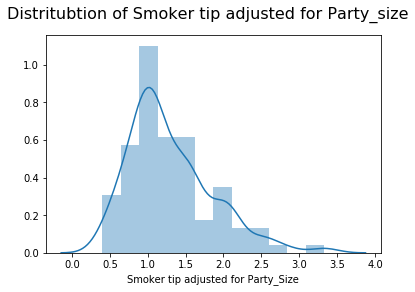

In [13]:
# Temp variable for smoker tip values
smoker_tip_party_size=(tips.tip.loc[tips.loc[:,'smoker'] == "Yes"]/
                       tips.party_size.loc[tips.loc[:,'smoker'] == "Yes"])
# Display the min, max and mean tip from smokers adjusted for party_size
print("""
Tip summary from smokers adjusted for party_size:
Max {0:.2f}, Min {1:.2f}, Mean {2:.2f} and Median {3:.2f}.
""".format(smoker_tip_party_size.max(),smoker_tip_party_size.min(),
           smoker_tip_party_size.mean(),smoker_tip_party_size.median()))

# Plot distribution of tips from smokers adjusted for party_size
# Code adapted from https://seaborn.pydata.org/generated/seaborn.distplot.html
plot = sns.distplot(smoker_tip_party_size,
                    axlabel="Smoker tip adjusted for Party_Size")

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.suptitle("Distritubtion of Smoker tip adjusted for Party_size", fontsize = 16)
plt.show()


Tip summary from non-smokers adjusted for party_size:
Max 2.92, Min 0.45, mean 1.16 and median 1.05.



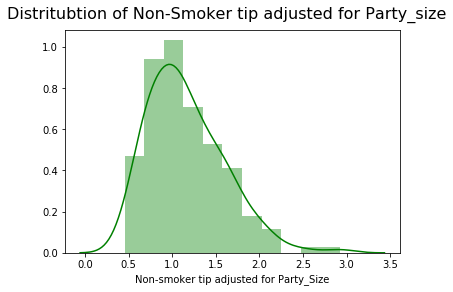

In [14]:
# Temp variable for non-smoker tip values
non_smoker_tip_party_size=(tips.tip.loc[tips.loc[:,'smoker'] == "No"]/
                           tips.party_size.loc[tips.loc[:,'smoker'] == "No"])
# Display the min, max, mean and median tip from non_smokers adjusted for party_size
print("""
Tip summary from non-smokers adjusted for party_size:
Max {0:.2f}, Min {1:.2f}, mean {2:.2f} and median {3:.2f}.
""".format(non_smoker_tip_party_size.max(), non_smoker_tip_party_size.min(),
           non_smoker_tip_party_size.mean(), non_smoker_tip_party_size.median()))

# Plot distribution of tips from non-smokers adjusted for party_size
plot = sns.distplot(non_smoker_tip_party_size, color='g',
                    axlabel="Non-smoker tip adjusted for Party_Size")

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.9)
plt.suptitle("Distritubtion of Non-Smoker tip adjusted for Party_size", fontsize = 16)
plt.show()

#### <font color='blue'>Review of Party Size effect</font>

A review the basic dataset statistics (noted above) and the party_size statistics (below) indicate that the party_size varies between 1 to 6 people per table and the most common party_size observed is 2 people per table. The larger sized party at a table can have an effect of how much total_bill and tip is received at a table.
In order to assess the total_bill and tip received effectively, these values should be adjusted to take account of party_size.

In [15]:
# Print Title
print("Party_size statistics")
# Print party_size counts on each day
pd.crosstab(index=tips['party_size'], columns=tips['day'], margins=True)

Party_size statistics


day,Thur,Fri,Sat,Sun,All
party_size,,,,,
1,1,1,2,0,4
2,48,16,53,39,156
3,4,1,18,15,38
4,5,1,13,18,37
5,1,0,1,3,5
6,3,0,0,1,4
All,62,19,87,76,244


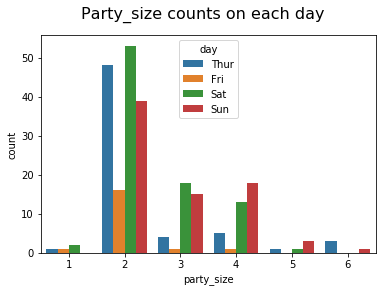

In [16]:
# Plot party_size counts on each day. Code adapted from
# https://seaborn.pydata.org/generated/seaborn.countplot.html
plot = sns.countplot(x="party_size", data=tips, hue="day")

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.suptitle("Party_size counts on each day", fontsize = 16)
plt.show()


total_bill per person value summary: Max  3.33, Min  0.40, Mean  1.21 and Median  1.11
tip value per person summary:        Max 20.27, Min  2.88, Mean  7.89 and Median  7.25


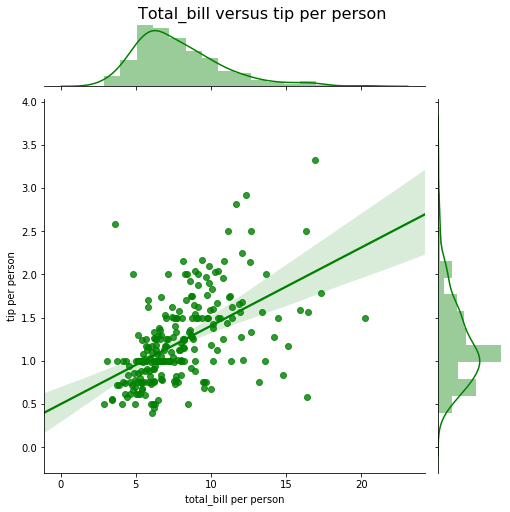

In [17]:
#The following statistics and plots show the relative distribution of total_bill and tip per person.

# Calculate tip per person. Code adapted from
# https://stackoverflow.com/a/26050459
tip_p_p = tips.apply(lambda row: np.round(row.tip/row.party_size,2), axis=1)
# Display the min, max, mean and median total_bill per person
print("\ntotal_bill per person value summary: Max {:5.2f}, Min {:5.2f}, Mean {:5.2f} and Median {:5.2f}".format(
       tip_p_p.max(), tip_p_p.min(), tip_p_p.mean(), tip_p_p.median()))

# Calculate total_bill per person. Code adapted from
# https://stackoverflow.com/a/26050459
bill_p_p = tips.apply(lambda row: np.round(row.total_bill/row.party_size,2), axis=1)
# Display the min, max, mean and median tip per person
print("tip value per person summary:        Max {:5.2f}, Min {:5.2f}, Mean {:5.2f} and Median {:5.2f}".format(
       bill_p_p.max(), bill_p_p.min(), bill_p_p.mean(), bill_p_p.median()))

# Code adapted from https://seaborn.pydata.org/generated/seaborn.jointplot.html
plot = sns.jointplot(x=bill_p_p, y=tip_p_p, kind="reg", height=7, color="g").set_axis_labels(
                                "total_bill per person", "tip per person")

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Total_bill versus tip per person", fontsize = 16)
plt.show()

A noticeable pattern that can be observed from the above plot is the frequency of tips per person with values of approximately **0.75, 1.00 and 1.50 dollars** as can be seen be the clustered lines of point data along these tip value. As indicated by histogram bar on the vertical axis, the most frequent tip appears to be approximately **1.00 dollar per person**. This may be a simpler method for patrons to determine how much to tip rather than having the calculate 15% of the bill.

#### <font color='blue'>Comparison of daily statistics</font>

The distribution of meal times are indicated in the following plots.

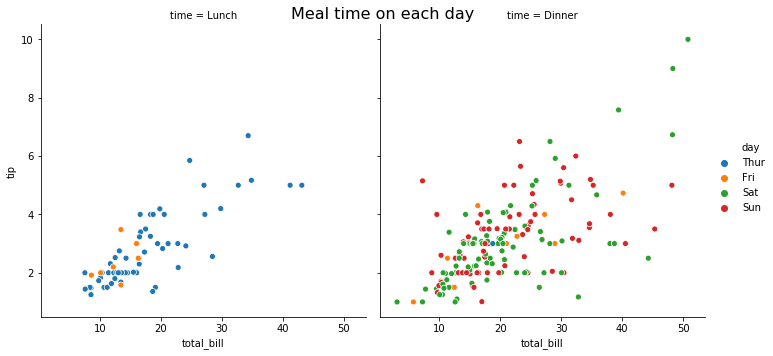

In [18]:
# Display relative plot of meal time on each day
plot = sns.relplot(x="total_bill", y="tip", col="time",
                   hue="day", data=tips);
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.suptitle("Meal time on each day", fontsize = 16)
plt.show()

The plots above highlight a distinctive trend in the data. Colour coding of the daily meals indicates that the majority of the lunch time meals occur on Thursday with a lower number on Friday both of which are during a normal working week. Dinner time meals at this restaurant appear to occur more frequently approaching or over the weekend Friday to Sunday, which is to be expected as people generally tend to relax and eat out more in the evenings at the weekend.

Daily split of total-bill and grouped by meal time


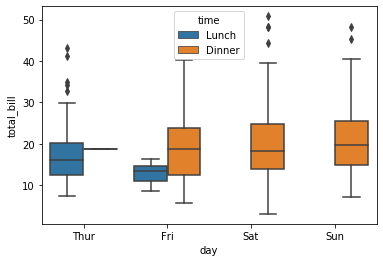

In [19]:
# Plot graph of daily split of total-bill and divided by meal time
print("Daily split of total-bill and grouped by meal time")
# Code adapted from https://seaborn.pydata.org/generated/seaborn.boxplot.html
plot = sns.boxplot(x="day", y="total_bill", data=tips, hue="time")

Daily split of tips


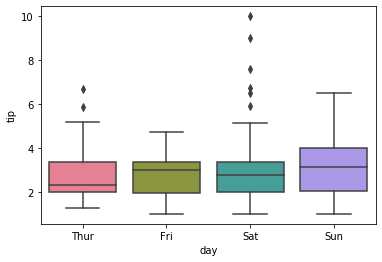

In [20]:
# Plot graph of daily split of tip
print("Daily split of tips")
# Code adapted from https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
plot = sns.boxplot(x="day", y="tip", data=tips, palette="husl")

In [21]:
# Print daily sums for total_bill and tip
# Code adapted from https://www.youtube.com/watch?v=_T8LGqJtuGc
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
day_paid = tips.pivot_table(['total_bill','tip'], columns='day', aggfunc='sum')
# Print the daily sum
print("Daily sum of total_bill and tip")
day_paid

Daily sum of total_bill and tip


day,Thur,Fri,Sat,Sun
tip,171.83,51.96,260.4,247.39
total_bill,1096.33,325.88,1778.4,1627.16


Plotting the daily split of the meals and above statistics confirms that Lunch time is the main meal on Thursday, there are mixed meal times on Friday and the only meal time on Saturday and Sunday is Dinner time. Saturday is the slightly better day for total tips. Sundays tips are good also, but a few large tips on Saturday push it ahead. Total tips received on Friday is significantly lower compared to the other three days as there are much less meals served on Friday than on the other three days.

When scrolling through the dataset, I noticed a pattern of continuous blocks of meal observations on a given day. When researching this phenomenon, I could not find a discussion of such a pattern so I decided to make my own observations. Assuming that the observations were recorded linearly over time, I thought it would interested to see to see if a shift rotation pattern for the waiter/waitress could be extracted from the data.

In [22]:
# The following code divides up the dataset into blocks of day

# Temp counter
counter = 0
# Temp placeholder for weekday set to first entry in tips dataset
weekday = tips.day[0]
# List of day blocks
day_list=[]
# List of day block counts
day_count_list=[]
# Print Title
print("Blocks of days with number of meals observed")
# Iterate through the index rows in the dataframe 'tips' to check for days of week
for index, row in tips.iterrows():
    # check if day in current row is not equal to weekday variable
    if (row['day'] != weekday):
        # Add 1 the previous day to counter
        counter += 1
        # Display the number of each day block
        # Text format adapted from https://pyformat.info/
        #print("{:2} meals on {:4}".format(counter, weekday))
        # Add previous day block to day list and counter list
        day_list.append(weekday)
        day_count_list.append(counter)
        # Change weekday to current row day
        weekday = row['day']
        # Reset to counter
        counter = 0
    # Otherwise the day in current row = weekday variable
    else:
        # Add 1 to the day counter
        counter += 1
# For the last row add 1 to the day counter
counter += 1
# Display the last day block
#print("{:2} meals on {:4}".format(counter, weekday))
# Add last day block to day list and counter list
day_list.append(weekday)
day_count_list.append(counter)

# Create new tuple joining day_list and day_count_list
# Code adapted from https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
days_tuple = list(zip(day_list,day_count_list))
# Create new Dataframe from joined tuple of day_list and day_count_list
days = pd.DataFrame(data=days_tuple, columns=['day','meals'])
# Display days dataframe table in transposed format Code adpated from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html#pandas.DataFrame.T
days.T

Blocks of days with number of meals observed


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
day,Sun,Sat,Sun,Sat,Thur,Fri,Sat,Sun,Thur,Sun,Sat,Sun,Thur,Sat,Fri,Sat,Thur
meals,20,22,15,21,13,12,10,5,33,18,4,19,15,14,7,16,1


In [23]:
# This code counts minimum number of  weeks in the day blocks
# The following assumption have been made
#    - One full week is from Thursday to Sunday
#    - Each block of day observation realte to one single day and
#    - There are no intermediate weeks not worked

# Create list of required week order
week = ["Thur", "Fri", "Sat", "Sun"]
# Placeholder for previous day index number, set to first row index value for the day
p_day_index = week.index(days.day[0])
# temp week number counter
week_count = 1

# Check for number of full weeks
for index, row in days.iterrows():
    # Set the day index value in current row = list index in list 'week'
    row_day_index = week.index(row['day'])
    # If the previous week index is > current row index
    if p_day_index > row_day_index:
        # Add 1 to the week count
        week_count +=1
    # Set the previous week index = current row index
    p_day_index = row_day_index
#Print the counted number of weeks
print("The minimum number of weeks observations are taken is {} weeks.".format(week_count))

The minimum number of weeks observations are taken is 9 weeks.


In [24]:
# This code joins together Dataframe describing for each day block for display

# Get description of Total meals
Days = days.describe()
# Change name of column
Days.rename(columns={'meals': 'Total_Meal_Blocks'}, inplace=True)

# Get description of Thur meals
Thur = days[days['day'] == 'Thur'].describe()
# Add Thur to df for display
# Code adapted from https://stackoverflow.com/questions/33497896/how-can-i-add-a-column-from-one-dataframe-to-another-dataframe
Days["Thur_Meals"] = Thur["meals"]

# Get description of Fri meals
Fri = days[days['day'] == 'Fri'].describe()
# Add Fri to df for display
Days["Fri_Meals"] = Fri["meals"]

# Get description of Sat meals
Sat = days[days['day'] == 'Sat'].describe()
# Add Sat to df for display
Days["Sat_Meals"] = Sat["meals"]

# Get description of Sun meals
Sun = days[days['day'] == 'Sun'].describe()
# Add Sun to df for display
Days["Sun_Meals"] = Sun["meals"]

# Print Title
print("Summary of observations for blocks of days")
# Display dataframe of meal day blocks
Days

Summary of observations for blocks of days


,Total_Meal_Blocks,Thur_Meals,Fri_Meals,Sat_Meals,Sun_Meals
count,17.000000,4.000000,2.000000,6.00000,5.000000
mean,14.411765,15.500000,9.500000,14.50000,15.400000
std,7.802714,13.203535,3.535534,6.80441,6.107373
min,1.000000,1.000000,7.000000,4.00000,5.000000
25%,10.000000,10.000000,8.250000,11.00000,15.000000
50%,15.000000,14.000000,9.500000,15.00000,18.000000
75%,19.000000,19.500000,10.750000,19.75000,19.000000
max,33.000000,33.000000,12.000000,22.00000,20.000000


Blocks of days with range of meals served


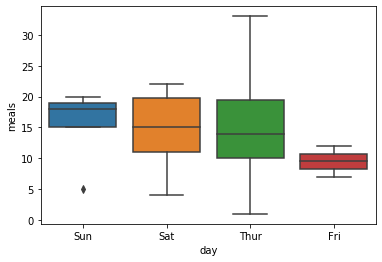

In [25]:
# Print Title
print("Blocks of days with range of meals served")
# Plot range of meals per day
# Code adapted from https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
plot = sns.boxplot(x=days.day, y=days.meals)

The 'tips' dataset includes 17 continuous blocks of meal observations on a given day. There does not seem to be a regular shift pattern in the day block grouping, so each block may be split over a number of different weeks or may be a single day. However, given the order of the observations, it highly probable that all of the observations were not recorded on four consecutive days. Given the order of the day blocks and a week starting on Thursday and ending on Sunday, there appears to be a least 9 weeks involved in the observation assuming that there was no interim weeks not work and each block of meals refers to a single day.

The majority of group blocks are on Saturday and Sunday (6 and 5 blocks respectively) suggesting the waiter/waitress worked more often on the weekends. Thursday has both the lowest and highest number of meal in a given block (1 to 33). As Thursday observations were wholly lunch time meals, it suggests that the lunch time shifts can be very sporadic. On average 15 meals are served by the waiter/waitress in each day block.

### <font color='blue'>Conclusion</font>
My analysis of the 'Tips' dataset recorded at this restaurant have highlighted the following points
- The waiter/waitress taking the observations either worked only on days ranging from Thursday to Sunday or the restaurant may be closed Monday to Wednesday
- 17 continuous blocks of meal observations on a given day are included in the dataset with an average of 15 meals per day block that appear to span at least a 9 week period
- The main trade on Thursday is Lunch time, mixed on Friday and exclusively Dinner time on Saturday and Sunday
- Saturday is best day and Friday is the worst for meal numbers served, tips and total_bill received
- The majority of the table bill paying patrons were non-smoking males (39.8%)
- The majority of tables have 2 people per table
- A guideline for an average tip rate is 15% of total_bill or 1 dollar per person at the table
- Per person at a table smokers on average, tend to spend slightly more and tip slightly better than non-smokers

### <font color='blue'>References</font>

[1] <i>Python</i>
- https://www.python.org/3/

[2] <i>Tips dataset sex variable</i>
- https://rdrr.io/cran/regclass/man/TIPS.html
- https://towardsdatascience.com/aggregation-and-grouping-66396f26dd95)
- https://dfrieds.com/data-analysis/groupby-python-pandas
- "Statistics and Machine Learning in Python" r0.3beta, 2019 Edouard Duchesnay, Tommy Löfstedt, Feki Younes
- https://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html

[3] <i>Tips dataset total_bill variable</i>
- "Python for Data Analysis" by Wes McKinney 2nd edition (2018) - Chapter 9
- https://rdrr.io/cran/regclass/man/TIPS.html
- https://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html

[4] <i>Pandas Dataframe</i>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html

[5] <i>Tip and total_bill percentage</i>
- https://eu.usatoday.com/story/money/2015/06/14/much-tip-depends/71137254/
- https://www.tripadvisor.com/Travel-g191-s606/United-States:Tipping.And.Etiquette.html

[6] <i>HTML Formatting</i>
- Italic text: https://www.tutorialspoint.com/How-to-make-text-italic-in-HTML
- Text colour: https://www.w3schools.com/tags/att_font_color.asp
- Justify table: https://stackoverflow.com/a/46022752